# Embeddings and Visualization

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [19]:
# Simplified 2D vectors
word_embeddings = {
"cat" : [0.8, 0.6],
"kitten": [0.75, 0.65],
"dog": [0.3, 0.3],
"puppy": [0.25, 0.35],
"car": [-0.5, 0.2],
"truck": [-0.45, 0.15]
}

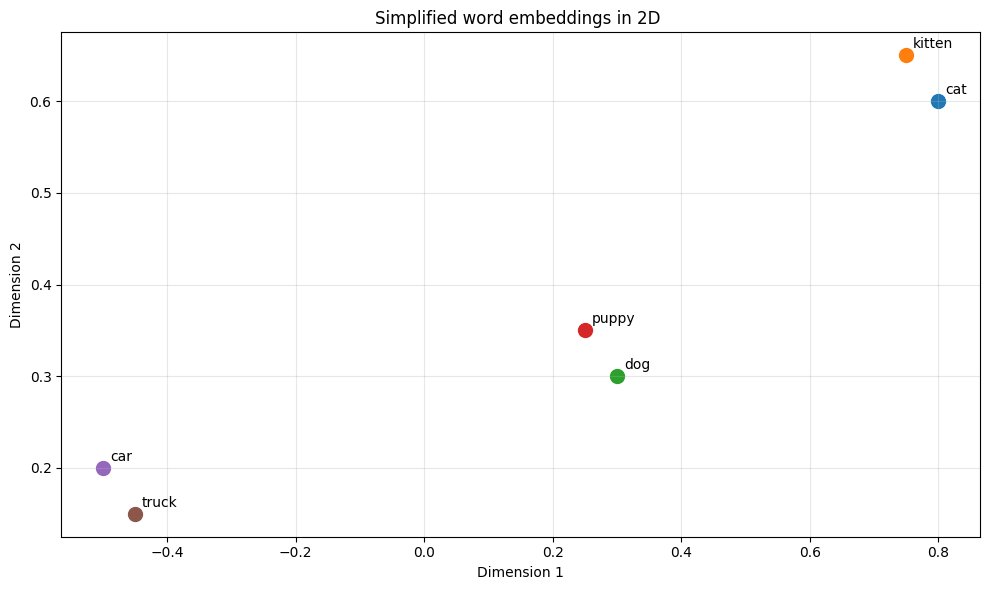

In [20]:
fig, ax = plt.subplots(figsize=(10,6))

for word, coords in word_embeddings.items():
    ax.scatter(coords[0], coords[1], s=100)
    ax.annotate(word, (coords[0], coords[1]), xytext=(5,5), textcoords='offset points')

ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
ax.set_title("Simplified word embeddings in 2D ")
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## Managing similarity

In [13]:
def cosine_similarity(vec1, vec2):
    """ 
    Cosine similarity measures angle between two vectors.
    - Results closer to 1: Very similar
    - Results closer to 0: Not similar
    - Results close to -1: Opposite meaning
    """

    dot_product = np.dot(vec1, vec2)
    norm_a = np.linalg.norm(vec1)
    norm_b = np.linalg.norm(vec2)

    return dot_product/(norm_a * norm_b)

In [14]:
cat_kitten_similarity = cosine_similarity(word_embeddings['cat'], word_embeddings['kitten'])
print(cat_kitten_similarity)

0.9975095892825593


In [21]:
cat_dog_similarity = cosine_similarity(word_embeddings['cat'], word_embeddings['dog'])
print(cat_dog_similarity)

0.9899494936611665


## Create your first embedding

In [22]:
### Huggingface and OpenAI Models
from langchain_huggingface import HuggingFaceEmbeddings

# Initialize a simple huggingface embedding model(No API key needed)
embeddings = HuggingFaceEmbeddings(
    model_name="sentence-transformers/all-MiniLM-L6-v2"
)
embeddings

HuggingFaceEmbeddings(model_name='sentence-transformers/all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, query_encode_kwargs={}, multi_process=False, show_progress=False)

In [23]:
## create your first embeddings
text="Hello I am learning about embeddings!"

# If you embed single sentence it is embeddings.embed_query if multiple sentences are embedded we should give embed_documents
embedding_vector = embeddings.embed_query(text)
print(f"Text: {text}")
print(f"Embedding_length: {len(embedding_vector)}")
print(f"Embedding vector: {embedding_vector}")

Text: Hello I am learning about embeddings!
Embedding_length: 384
Embedding vector: [-0.01103600487112999, -0.09405086934566498, 0.008507773280143738, -0.012301971204578876, 0.014272098429501057, 0.07370393723249435, -0.0009105822537094355, 0.0006810053018853068, 0.03519173711538315, -0.016695456579327583, 0.02561211958527565, 0.06964530795812607, 0.054736871272325516, 0.016683874651789665, -0.0644545927643776, 0.012313701212406158, 0.026148278266191483, 0.09564018994569778, -0.06468818336725235, 0.013845722191035748, -0.0183308944106102, -0.06100038066506386, 0.014586685225367546, -0.08376239985227585, 0.019406698644161224, -0.012581350281834602, -0.04602354019880295, 0.04457138106226921, 0.09914430975914001, -0.0818752571940422, 0.03882306069135666, -0.020534148439764977, -0.02499413676559925, 0.06991858035326004, -0.06788872927427292, 0.10626787692308426, 0.043364111334085464, -0.01227500382810831, -0.06482521444559097, -0.001400952460244298, 0.014898420311510563, 0.0357632227241992

In [25]:
sentences = [
    'The cat sat on the mat',
    'A feline rested on the rug',
    'The dog played in the yard',
    'I love programming in python',
    'Python is my favorite programming language'
]

embedded_sentence = embeddings.embed_documents(sentences)
print(f"Sentences: {sentences}")
for i in range(len(embedded_sentence)):
    print(f"Embedding length: {len(embedded_sentence[i])}")
print(embedded_sentence)

Sentences: ['The cat sat on the mat', 'A feline rested on the rug', 'The dog played in the yard', 'I love programming in python', 'Python is my favorite programming language']
Embedding length: 384
Embedding length: 384
Embedding length: 384
Embedding length: 384
Embedding length: 384
[[0.1304018348455429, -0.011870156042277813, -0.028116997331380844, 0.051238544285297394, -0.055974505841732025, 0.03019152767956257, 0.030161302536725998, 0.024698294699192047, -0.01837053894996643, 0.05876684561371803, -0.024953141808509827, 0.06015419960021973, 0.03983170911669731, 0.033230509608983994, -0.06131141632795334, -0.04937310889363289, -0.05486347898840904, -0.04007610306143761, 0.05642913281917572, 0.039156604558229446, -0.03473712131381035, -0.013247719034552574, 0.03196623548865318, -0.06349916756153107, -0.06017857789993286, 0.07823452353477478, -0.028303835541009903, -0.047442808747291565, 0.040359318256378174, -0.0066309357061982155, -0.0667409673333168, -0.004191323649138212, -0.02531